In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df=pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df[df['sqft_above'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


<Axes: xlabel='grade', ylabel='sqft_above'>

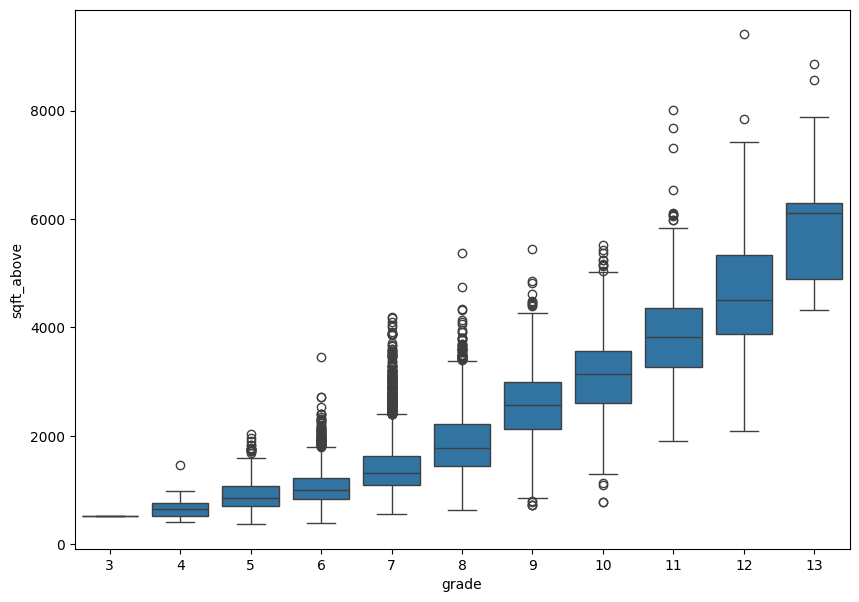

In [8]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='grade', y='sqft_above', data=df)

In [9]:
df['sqft_above'] = df[['sqft_above', 'grade']].apply(
    lambda sqft_grade:
    df.groupby('grade').mean()['sqft_above'].loc[sqft_grade[1]] if pd.isnull(sqft_grade[0]) else sqft_grade[0],
    axis=1
)

correlation matrix

[Text(0.5, 0, 'Number of Bedrooms'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Comparison of House price and number of bedrooms')]

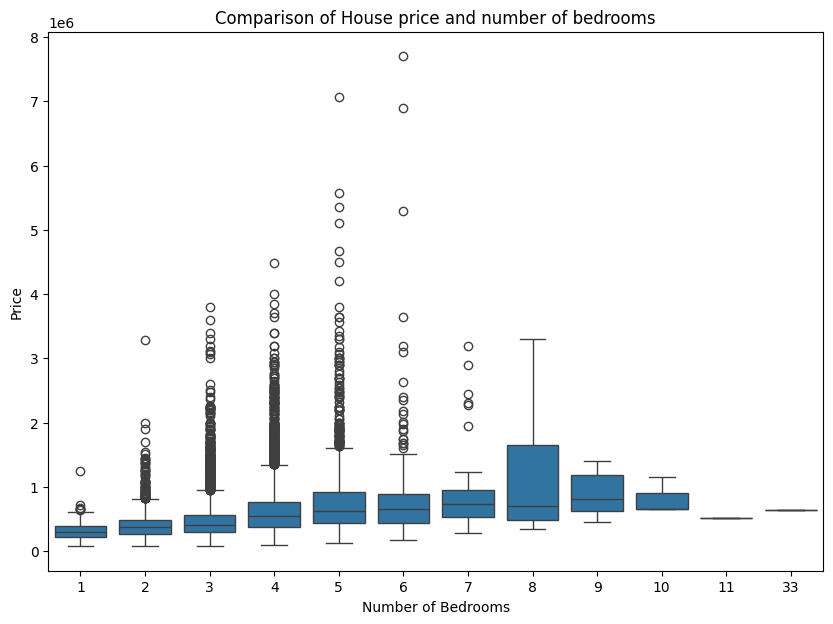

In [10]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='bedrooms', y='price', data=df).set(xlabel='Number of Bedrooms', ylabel='Price', title='Comparison of House price and number of bedrooms')

In [11]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
print('Correlation value between Number of Bedrooms and Price: ', df.corr().loc['price', 'bedrooms'])

Correlation value between Number of Bedrooms and Price:  0.3087874719565322


In [12]:
df.duplicated().sum()

0

Feature selection and Data preparation

In [13]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Import LinearRegression
model = LinearRegression()

features = ['sqft_living', 'bedrooms', 'bathrooms']
target = 'price'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Model Initialization

In [14]:
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
mse=mean_squared_error(y_test, prediction)
print("Mean Squared Error:",mse)

Mean Squared Error: 65038882112.369255


In [15]:
new_data = pd.DataFrame({'sqft_living': [1500], 'bedrooms': [3], 'bathrooms': [2]})
predicted_price = model.predict(new_data)
print("Predicted Prince: ", predicted_price[0])

Predicted Prince:  381734.8296793577


Data visualization

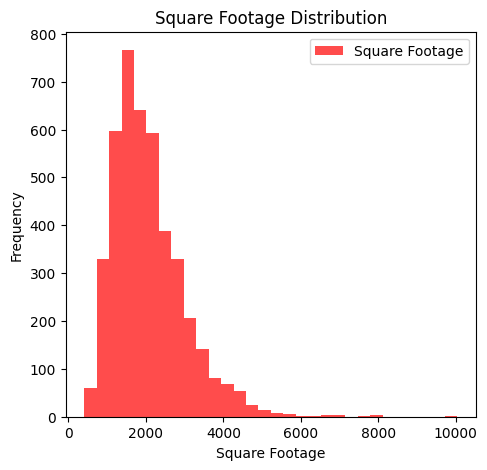

In [16]:
plt.figure(figsize=(18,5))

#visualizing histograms for square footage
plt.subplot(1,3,1)
plt.hist(X_test['sqft_living'],bins = 30, color = 'red', alpha = 0.7, label = 'Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.title('Square Footage Distribution')
plt.legend()

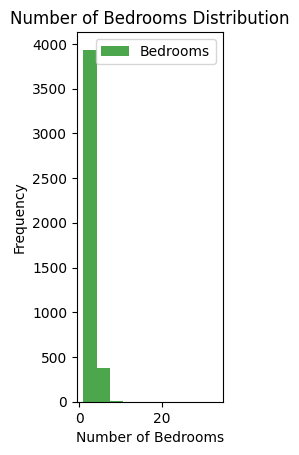

In [17]:
plt.subplot(1, 3, 2)
plt.hist(X_test['bedrooms'], bins=10, color='Green', alpha=0.7, label='Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Number of Bedrooms Distribution')
plt.legend()

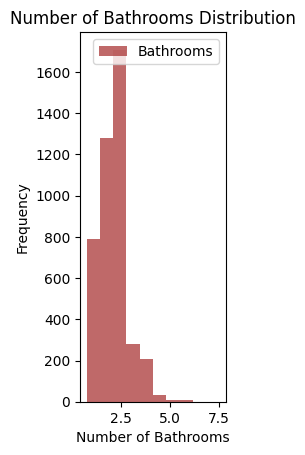

In [18]:
plt.subplot(1, 3, 3)
plt.hist(X_test['bathrooms'], bins=10, color='brown', alpha=0.7, label='Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Number of Bathrooms Distribution')
plt.legend()

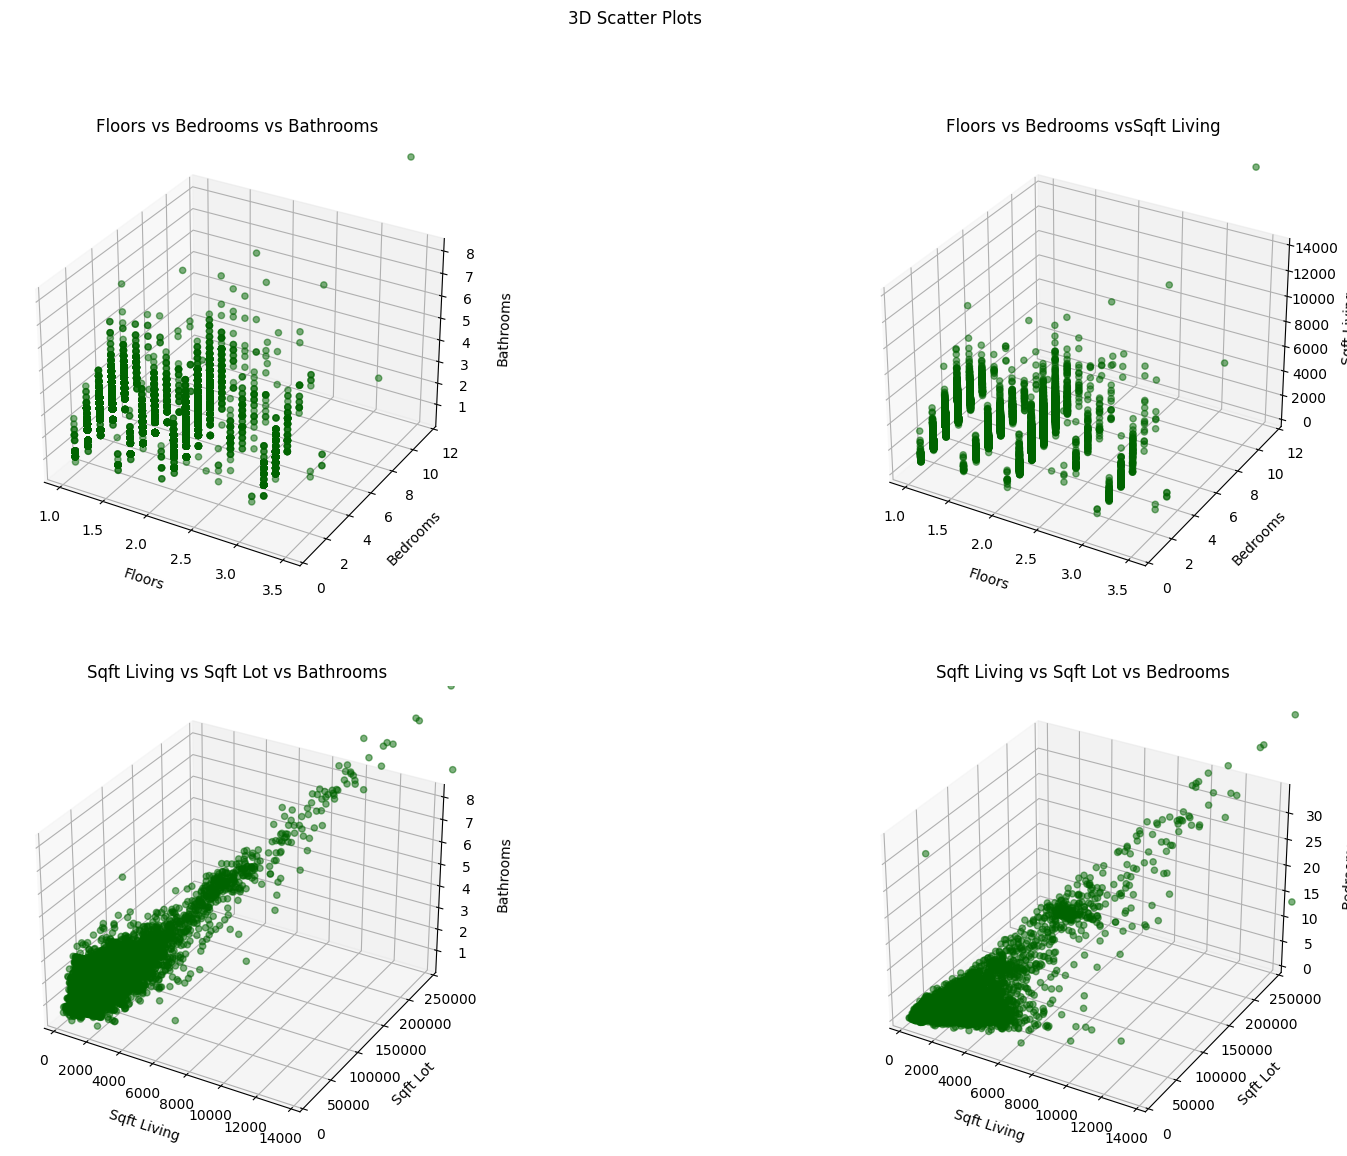

In [19]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=('Floors vs Bedrooms vs Bathrooms',
                    'Floors vs Bedrooms vs Sqft Living',
                    'Sqft Living vs Sqft Lot vs Bathrooms',
                    'Sqft Living vs Sqft Lot vs Bedrooms')
)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 13))

# First 3D scatter plot
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(df['floors'], df['bedrooms'], df['bathrooms'], c='darkgreen', alpha=0.5)
ax1.set_xlabel('\nFloors')
ax1.set_ylabel('\nBedrooms')
ax1.set_zlabel('\nBathrooms')
ax1.set_ylim([0, 12])
ax1.set_title('Floors vs Bedrooms vs Bathrooms')

# Second 3D scatter plot
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(df['floors'], df['bedrooms'], df['sqft_living'], c='darkgreen', alpha=0.5)
ax2.set_xlabel('\nFloors')
ax2.set_ylabel('\nBedrooms')
ax2.set_zlabel('\nSqft Living')
ax2.set_ylim([0, 12])
ax2.set_title('Floors vs Bedrooms vsSqft Living')

# Third 3D scatter plot
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(df['sqft_living'], df['sqft_lot'], df['bathrooms'], c='darkgreen', alpha=0.5)
ax3.set_xlabel('\nSqft Living')
ax3.set_ylabel('\nSqft Lot')
ax3.set_zlabel('\nBathrooms')
ax3.set_ylim([0, 250000])
ax3.set_title('Sqft Living vs Sqft Lot vs Bathrooms')

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(df['sqft_living'], df['sqft_lot'], df['bedrooms'], c='darkgreen', alpha=0.5)
ax4.set_xlabel('\nSqft Living')
ax4.set_ylabel('\nSqft Lot')
ax4.set_zlabel('\nBedrooms')
ax4.set_ylim([0, 250000])
ax4.set_title('Sqft Living vs Sqft Lot vs Bedrooms')

plt.suptitle('3D Scatter Plots')
plt.show()

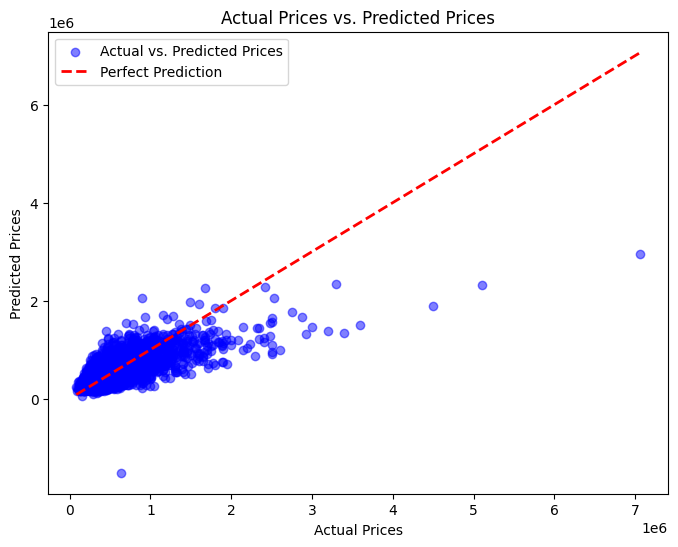

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, color='blue', alpha=0.5, label='Actual vs. Predicted Prices')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend(loc='upper left')

plt.show()

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# R-squared score
r2 = r2_score(y_test, prediction)
print('R-squared:', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, prediction)
print('Mean Absolute Error:', mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', rmse)

R-squared: 0.5005318685518607
Mean Absolute Error: 168471.30830252025
Root Mean Squared Error: 255027.2183755476
